# Seismic wavelets

## Exemples to use for deconvolution of shallow seismic reflection data. 

Tobias Stål, 2015

This notebook contains two separate examples to generate wavelets. In the first exemple a ricker wavelet is generated. 


In [ ]:
#Plot in document
%matplotlib inline

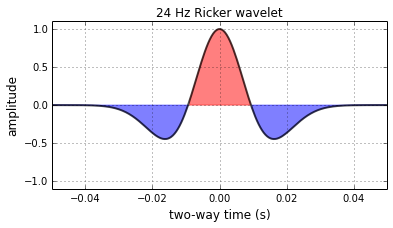

In [52]:
#Plot a Ricker wavelet
#Define frequency, f 

import numpy as np
import matplotlib.pyplot as plt


def ricker(f, length=0.100, dt=0.0005):
    t = np.linspace(-length/2, (length-dt)/2, length/dt)
    y = (1.-2.*(np.pi**2)*(f**2)*(t**2))*np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y

#	Dominating frequency    
f = 24
    
t, y = ricker (f)

plt.figure(figsize=(6,3))
plt.plot( t, y, lw=2, color='black', alpha=0.7)
plt.fill_between(t, y, 0, y < 0.0, interpolate=False, hold=True, color='blue', alpha = 0.5)
plt.fill_between(t, y, 0,  y > 0.0, interpolate=False, hold=True, color='red', alpha = 0.5)
plt.title('%d Hz Ricker wavelet' %f, fontsize = 12 )
plt.xlabel( 'two-way time (s)', fontsize = 12)
plt.ylabel('amplitude', fontsize = 12)
plt.ylim((-1.1,1.1))
plt.xlim((min(t),max(t)))

plt.grid()
plt.show()

In the second exemple, a Klauder wavelet is generated. The wavelet is the result of crosscorelated sweep data, e.g. vibroseis.

$
\psi(t) = \frac{1}{\sqrt {2\pi}\omega^3} \left( 1 - {t^2 \over \omega^2} \right) e^{-t^2 \over 2\omega^2}
$

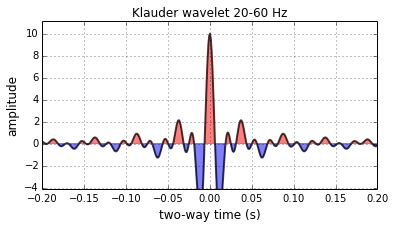

In [53]:
#	Plot a Klauder wavelet
#	Define frequency, f1 and f2 
#	Define length of sweep, T
#	Adjust function length and dt if needed

def klauder(k,T,f0, length, dt):
    t = np.linspace(-length/2, (length-dt)/2, length/dt)
    y = (np.sin(np.pi*k*t*(T-t))/((np.pi*k*t)*np.exp(2*np.pi*(0+1j)*f0*t))).real
    return t, y

#	sweep   
f1=20
f2=60
T = 10
length=0.400 
dt=0.001

k= (f2-f1)/T
f0 = (f1+f2)/2    
t, y = klauder(k,T,f0,length,dt)

plt.figure(figsize=(6,3))
plt.plot( t, y, lw=2, color='black', alpha=0.7)
plt.fill_between(t, y, 0, y < 0.0, interpolate=False, hold=True, color='blue', alpha = 0.5)
plt.fill_between(t, y, 0,  y > 0.0, interpolate=False, hold=True, color='red', alpha = 0.5)
plt.title('Klauder wavelet %s-%s Hz' %(f1,f2), fontsize = 12 )
plt.xlabel('two-way time (s)', fontsize = 12)
plt.ylabel('amplitude', fontsize = 12)
plt.ylim((-4.1,11.1))
plt.xlim((min(t),max(t)))
 
plt.grid()
plt.show()

#Normalize  
y=y/max(y)

We can also export the wavelet as a datafile to use in seismic processing. The wavelet is exported in rsf format using rsf.api 

$
A(t) = \mathrm{Re} \frac{\sin (\pi k t (T-t)}{\pi k t \mathrm{e}^{2 \pi \mathrm{i} f_0 t}}
$

In [49]:
import rsf.api as rsf

#Export as rsf
po = rsf.Output('klauder.rsf')	
po.put('o2',0)
po.put('d2',1)
po.put('n2',1)
po.put('o1',1)
po.put('d1',dt)
po.put('n1',length/dt)			#Sampling length
po.write(y.astype('f'))
po.close()

References:

* John R Klauder, AC Price, Sidney Darlington, and Walter J Albersheim. The theory and design of chirp radars. Bell System Technical Journal, 39(4):745–808, 1960.
    
* Norman Ricker. The form and laws of propagation of seismic wavelets. Geophysics, 18(1):10–40, 1953.
* Özdoğan Yilmaz. Seismic data analysis, volume 1. Society of Exploration Geophysicists Tulsa, 2001.